In [244]:
import numpy as np
import matplotlib.pyplot as plt

In [245]:
# Michalewicz 
def michalewicz(x, m=10):
    x1, x2 = x
    term1 = np.sin(x1) * (np.sin(x1**2 / np.pi))**(2 * m)
    term2 = np.sin(x2) * (np.sin(2 * x2**2 / np.pi))**(2 * m)
    return -(term1 + term2) + 2  

In [246]:
def select(f, population):
    fitness = np.array([f(ind) for ind in population])
    normalized_fitness = fitness / np.sum(fitness) 
    sorted_indices = np.argsort(normalized_fitness) 
    cutoff = len(population) // 2
    return population[sorted_indices[:cutoff]]

In [247]:
# Crossover
def crossover(parents, num_children):
    children = []
    num_parents = len(parents)
    for _ in range(num_children):
        i, j = np.random.choice(num_parents, 2, replace=False)
        eta = np.random.rand() 
        child = (1 - eta) * parents[i] + eta * parents[j]
        children.append(child)
    return np.array(children)

In [248]:
# Mutation
def mutate(children, mutation_rate=0.05):
    noise = mutation_rate * np.random.randn(*children.shape)
    mutated_children = children + noise
    mutated_children[:, 0] = np.clip(mutated_children[:, 0], 0, 4)
    mutated_children[:, 1] = np.clip(mutated_children[:, 1], 0, 4)
    return mutated_children

In [249]:
# Genetic Algorithm
def genetic_algo(f, population, generations):
    for gen in range(generations):
        parents = select(f, population)
        children = crossover(parents, len(population))
        population = mutate(children, mutation_rate=0.05) 
    return population

In [250]:
# Plot
def plot_michalewicz(f, population, title="Michalewicz"):
    x = np.linspace(0, 4, 500)
    y = np.linspace(0, 4, 500)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([xi, yi]) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, 50, cmap="viridis")
    plt.scatter(population[:, 0], population[:, 1], color="red", label="Population")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

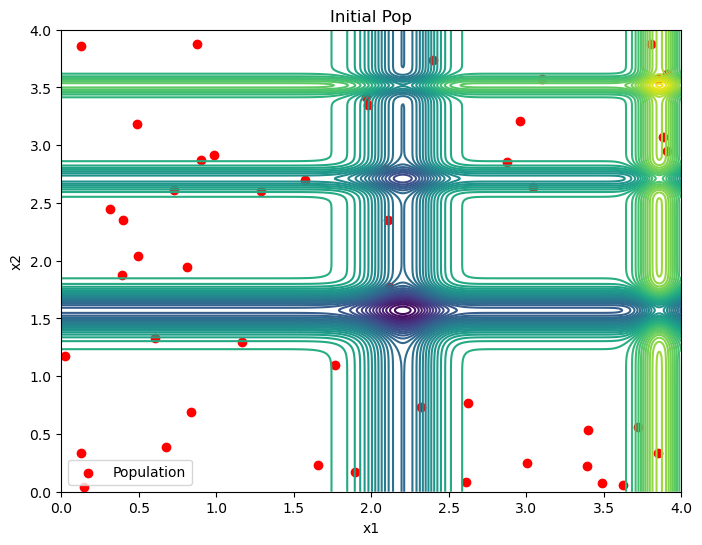

In [251]:
# Michalewicz function
f = lambda x: michalewicz(x, m=10)

# Initial populations
num_individuals = 50  
population = np.random.rand(num_individuals, 2) * 4 

# Plot
plot_michalewicz(f, population, title="Initial Pop")

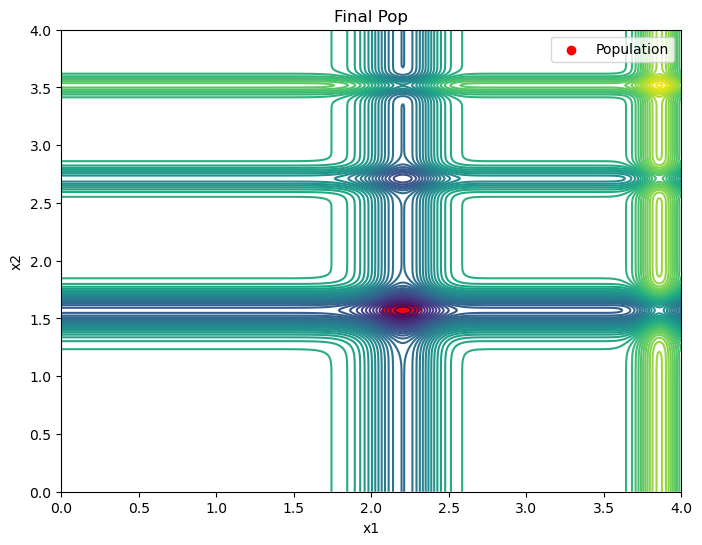

In [252]:
generations = 100  
final_population = genetic_algo(f, population, generations)
plot_michalewicz(f, final_population, title="Final Pop")

In [253]:
fitness = np.array([f(ind) for ind in final_population])
best_idx = np.argmin(fitness)
best_solution = final_population[best_idx]
best_value = fitness[best_idx]
original_value = best_value - 2 

print("Optimal Solution:", best_solution)
print("Function Value at Optimal (Shifted):", best_value)
print("Function Value at Optimal:", original_value)

Optimal Solution: [2.20412921 1.57572038]
Function Value at Optimal (Shifted): 0.19970548715348513
Function Value at Optimal: -1.8002945128465149
